In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn
from pyneb.utils.physics import IP

In [2]:
%%writefile observations.dat
LINE OBS1
S4_10.5m   7.00000
Ne2_12.8m  8.3000
Ne3_15.6m 34.10
S3_18.7m  10.
O2_3726A  39.700
O2_3729A  18.600
Ne3_3869A 18.90
Ne3_3968A  6.4
S2_4069A   0.85
S2_4076A   0.450
O3_4363A   4.36
He2r_4686A  10.10
H1r_4861A 100.00
O3_5007A 435.09
N2_5755A   0.510000
He1r_5876A 18.50
S3_6312A   0.76
O1_6300A   1.69
O1_6364A   0.54
N2_6548A   6.840000
H1r_6563A  345.00
N2_6584A  19.00
S2_6716A   1.220000
S2_6731A   2.180000
Ar3_7136A  4.91
O2_7319A+   6.540000
O2_7330A+   5.17

Writing observations.dat


In [3]:
obs = pn.Observation('./observations.dat', fileFormat='lines_in_rows', err_default=0.05) # fill obs with data read from smc_24.dat
for l in obs.lines:
    if l.obsIntens < 10:
        l.obsError *= 3 # set error based on intensity
    elif l.obsIntens < 50:
        l.obsError *= 2 
    if l.wave > 1e4:
        l.obsError *= 2  # increase errors for IR lines
obs.addMonteCarloObs(N=100)
l = obs.getLine(label='H1r_4861A')
l.obsIntens = np.ones_like(l.obsIntens) * 100 # set all intensities to 100

In [4]:
obs.def_EBV(label1="H1r_6563A", label2="H1r_4861A", r_theo=2.85)
obs.correctData(normWave=4861.)
obs.printIntens()

S4_10.5m      4.076    4.990    5.051    4.108   -0.274    4.277    0.902    4.189    3.102    2.103    2.703    4.425    4.829    2.721    4.152    5.860    4.955    2.002    3.707    5.517    2.049    4.749    4.077    4.563    3.122    5.704    4.665    4.600    2.661    4.448    2.625    5.874    5.560    4.550    3.991    5.136    4.614    6.593    3.955    4.115    1.139    2.072    4.052    3.254    2.889    4.292    4.203    3.949    3.879    5.131    5.015    4.184    6.336    3.782    3.759    3.910    5.346    5.079    6.345    5.977    4.359    4.863    3.829    3.321    4.005    4.405    4.350    8.753    3.526    4.510    4.826    2.110    4.000    4.523    4.972    1.803    5.306    1.876    2.775    2.127    4.610    3.734    5.013    4.242    5.554    3.459    4.764    3.757    3.399    4.555    2.526    3.225    4.869    4.939    1.016    4.016    3.582    4.248    3.099    2.648    4.247
Ne2_12.8m     4.826    6.150    6.395    4.366    3.856    3.551    3.423    4.5

In [5]:
obs.extinction.cHbeta

array([0.23836253, 0.26199732, 0.22154744, 0.27846046, 0.25530862,
       0.20279596, 0.3030014 , 0.26174425, 0.27708915, 0.23014596,
       0.26585731, 0.19638769, 0.20426883, 0.24577736, 0.25008395,
       0.21038977, 0.24596071, 0.19411991, 0.27291839, 0.21194827,
       0.25552072, 0.30511715, 0.23223514, 0.22471092, 0.20615908,
       0.22475763, 0.22161747, 0.23113194, 0.26834071, 0.26406378,
       0.24923016, 0.25910671, 0.15481781, 0.26686998, 0.1329494 ,
       0.22751663, 0.29772614, 0.13187652, 0.26829476, 0.21040776,
       0.32861018, 0.29580966, 0.25369463, 0.14545005, 0.19533865,
       0.27336245, 0.19558856, 0.26028418, 0.32021428, 0.17942087,
       0.24844564, 0.19481061, 0.16650817, 0.20586354, 0.1982251 ,
       0.21163206, 0.20665709, 0.26925703, 0.15413991, 0.15493874,
       0.16069911, 0.03622173, 0.31016307, 0.26242701, 0.17850052,
       0.28515481, 0.26325969, 0.17057346, 0.22769227, 0.25413701,
       0.13541526, 0.35084369, 0.24182239, 0.26943401, 0.27617

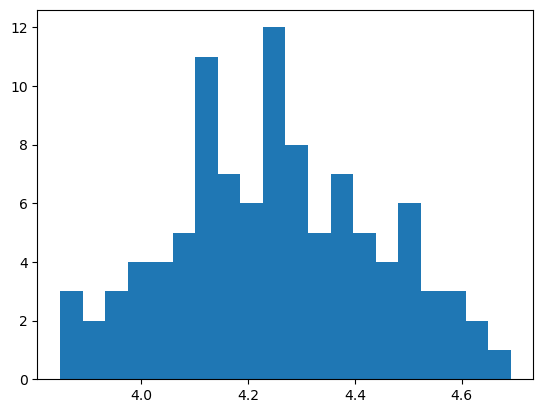

In [6]:
f, ax = plt.subplots()
ax.hist(obs.getIntens()['O3_5007A']/obs.getIntens()['H1r_4861A'], bins=20);

In [13]:
diag = pn.Diagnostics()

In [14]:
diag.addDiagsFromObs(obs)

In [15]:
diag.diags

{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 '[OII] 3726/3729': ('O2', 'L(3726)/L(3729)', 'RMS([E(3729), E(3726)])'),
 '[OII] 3727+/7325+': ('O2',
  '(L(3726)+L(3729))/(B("7319A+")+B("7330A+"))',
  'RMS([E(3726)*L(3726)/(L(3726)+L(3729)), E(3729)*L(3729)/(L(3726)+L(3729)),BE("7319A+")*B("7319A+")/(B("7319A+")+B("7330A+")),BE("7330A+")*B("7330A+")/(B("7319A+")+B("7330A+"))])'),
 '[OIII] 4363/5007': ('O3', 'L(4363)/L(5007)', 'RMS([E(5007), E(4363)])'),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SII] 4069/4076': ('S2', 'L(4069)/L(4076)', 'RMS([E(4069), E(4076)])'),
 '[SII] 4072+/6720+': ('S2',
  '(L(4069)+L(4076))/(L(6716)+L(6731))',
  'RMS([E(6716)*L(6716)/(L(6716)+L(6731)), E(6731)*L(6731)/(L(6716)+L(673

In [10]:
all_atoms = obs.getUniqueAtoms()

In [11]:
all_atoms

array(['Ar3', 'H1r', 'He1r', 'He2r', 'N2', 'Ne2', 'Ne3', 'O1', 'O2', 'O3',
       'S2', 'S3', 'S4'], dtype='<U4')

In [12]:
emisDict = pn.getEmisGridDict(atom_list=all_atoms)

warng getEmisGridDict: Emission map not found: ./pypics//emis_H1r.pypic
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng getEmisGridDict: No H1r EmisGrid
warng getEmisGridDict: Emission map not found: ./pypics//emis_He1r.pypic
warng _ManageAtomicData: atom data not available for He1
warng _ManageAtomicData: coll data not available for He1
warng getEmisGridDict: No He1r EmisGrid
warng getEmisGridDict: Emission map not found: ./pypics//emis_He2r.pypic
warng _ManageAtomicData: atom data not available for He2
warng _ManageAtomicData: coll data not available for He2
warng getEmisGridDict: No He2r EmisGrid


In [13]:
emisDict

{'Ar3': <pyneb.core.emisGrid.EmisGrid at 0x168a00560>,
 'N2': <pyneb.core.emisGrid.EmisGrid at 0x168a00650>,
 'Ne2': <pyneb.core.emisGrid.EmisGrid at 0x127dd7b90>,
 'Ne3': <pyneb.core.emisGrid.EmisGrid at 0x168d72570>,
 'O1': <pyneb.core.emisGrid.EmisGrid at 0x168d720c0>,
 'O2': <pyneb.core.emisGrid.EmisGrid at 0x168d70dd0>,
 'O3': <pyneb.core.emisGrid.EmisGrid at 0x168d9d7c0>,
 'S2': <pyneb.core.emisGrid.EmisGrid at 0x168d3f680>,
 'S3': <pyneb.core.emisGrid.EmisGrid at 0x168d3f020>,
 'S4': <pyneb.core.emisGrid.EmisGrid at 0x168d3efc0>}

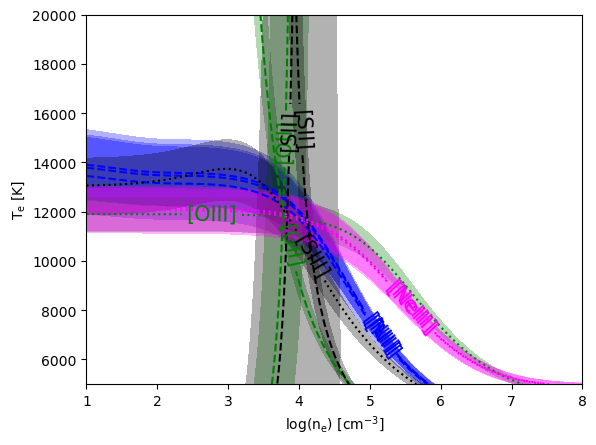

In [14]:
diag.plot(emis_grids=emisDict, obs=obs, i_obs=0)

In [15]:
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs)

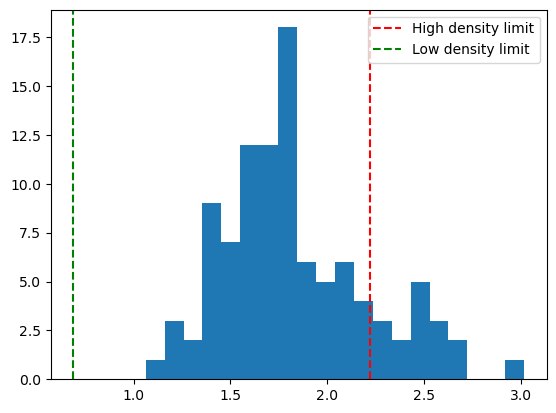

In [16]:
S2 = pn.Atom('S', 2)
H_ratio =S2.getHighDensRatio(wave1 = 6731, wave2 = 6716)
L_ratio =S2.getLowDensRatio(wave1 = 6731, wave2 = 6716)
f, ax = plt.subplots()
ax.hist(obs.getLine(label='S2_6731A').obsIntens / obs.getLine(label='S2_6716A').obsIntens, bins=20);
ax.axvline(H_ratio, color='r', linestyle='--', label='High density limit')
ax.axvline(L_ratio, color='g', linestyle='--', label='Low density limit')
ax.legend()

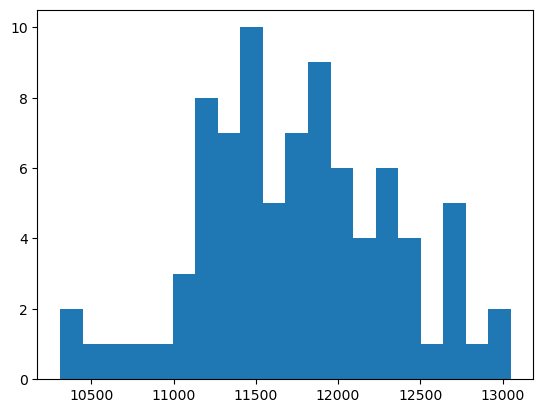

In [17]:
f, ax = plt.subplots()
ax.hist(T_O3, bins=20);

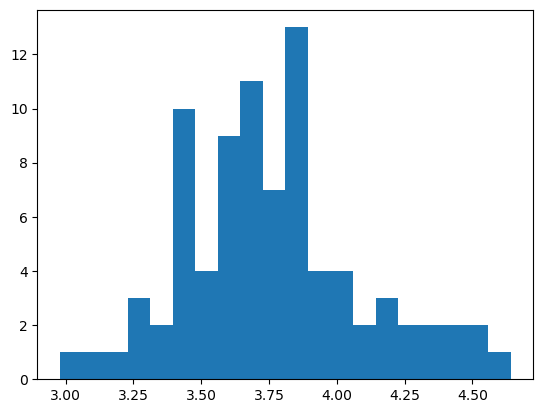

In [18]:
f, ax = plt.subplots()
ax.hist(np.log10(N_S2), bins=20);

In [19]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.1f} +/- {np.nanstd(np.log10(N_S2)):.1f}  cm-3')

Te = 11724.0 K +/- 586.3
log Ne = 3.7 +/- 0.3  cm-3


In [20]:
T_N2, N_S2b = diag.getCrossTemDen('[NII] 5755/6584', '[SII] 6731/6716', obs=obs)

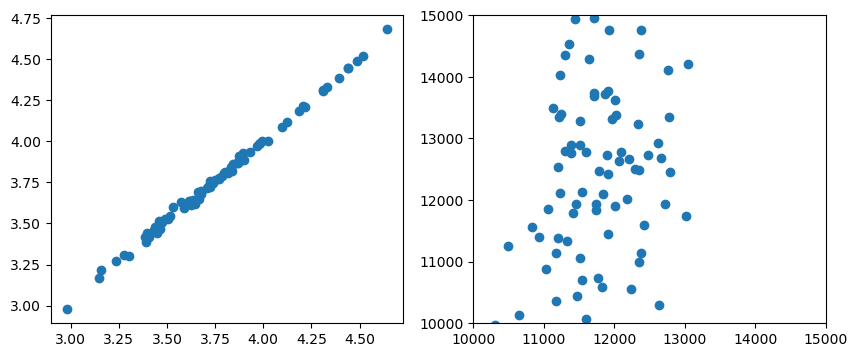

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(np.log10(N_S2), np.log10(N_S2b))
ax2.scatter(T_O3, T_N2)
ax2.set_xlim(10000, 15000)
ax2.set_ylim(10000, 15000);

In [22]:
N_S2

array([ 6816.03026438, 20377.7282779 ,  2549.4924438 ,  5280.33961322,
        9891.08097795,  7003.9028326 ,            nan,  2861.80665091,
        6291.60917151,  2823.16322071, 43862.43591803,  4219.30467955,
                  nan,  7738.17096289,  2429.18537903,  3744.6759729 ,
                  nan,  6723.99232405,  4761.27826572,            nan,
        1396.44680345,            nan,            nan,  1887.57002073,
        4257.71990641,  5165.94015321,  4619.58427929,  3190.61716729,
        9262.03253079,  5127.06948547,  6244.26850506,  1711.04289138,
       12444.02408508,  7440.14587573, 20377.7282779 ,  2716.48389346,
        5609.22930183,  4394.94850269,  5296.31641061,  2488.61201645,
        5296.31641061, 27690.48476794,  2808.27653029,            nan,
                  nan, 21290.24882649, 30732.42761869,  1439.27925384,
         954.34184096,  4775.68453194,  7564.80641283,  6523.88864937,
        4302.97994772, 16555.83793752, 13299.22443488,  7879.71884996,
      

In [23]:
#Create a dictionnary that olds all the atom objects
atomDict = pn.getAtomDict(atom_list=all_atoms)
ion_ab_dic = {}
for line in obs.getSortedLines():
    atom = atomDict[line.atom]
    ion_ab_dic[line.label] = atom.getIonAbundance(line.corrIntens, T_O3, N_S2, to_eval=line.to_eval)

warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng _ManageAtomicData: atom data not available for He1
warng _ManageAtomicData: coll data not available for He1
warng _ManageAtomicData: atom data not available for He2
warng _ManageAtomicData: coll data not available for He2
warng _ManageAtomicData: rec data not available for Ne3
warng _ManageAtomicData: rec data not available for S2
warng _ManageAtomicData: rec data not available for S3
warng _ManageAtomicData: rec data not available for S4


In [24]:
ion_ab_dic

{'Ar3_7136A': array([2.22326965e-07, 1.82962131e-07, 2.36360736e-07, 2.73493681e-07,
        2.73688476e-07, 2.88276275e-07,            nan, 2.61101482e-07,
        1.26399405e-07, 2.14172110e-07, 2.53285321e-07, 1.72735382e-07,
                   nan, 2.08193260e-07, 2.56875733e-07, 2.16239176e-07,
                   nan, 4.09769998e-07, 2.25616696e-07,            nan,
        2.45571689e-07,            nan,            nan, 2.07413348e-07,
        1.75135530e-07, 1.66019422e-07, 2.05457857e-07, 2.63705283e-07,
        2.84349016e-07, 2.40696066e-07, 2.03136002e-07, 1.76026271e-07,
        2.40745407e-07, 2.14632980e-07, 3.15078171e-07, 2.54633717e-07,
        1.88597983e-07, 2.07636223e-07, 1.89487940e-07, 2.15787056e-07,
        1.78337370e-07, 2.18856003e-07, 2.12355891e-07,            nan,
                   nan, 3.45235862e-07, 2.42428931e-07, 2.38801155e-07,
        1.83787437e-07, 1.36100096e-07, 1.76627260e-07, 2.44476211e-07,
        1.96244537e-07, 2.01541053e-07, 2.54711709e

In [25]:
# define a dictionary for the ionic abundances
ab_dic = {}
ab_dic_mean = {}
ab_dic_std = {}
# we  use the following lines to determine the ionic abundances
ab_labels = ['N2_6584A', 'N3_57.4m', 'N4_1487A', 
                'O2_3726A', 'O2_3729A', 'O3_5007A', 'O4_25.9m',
                'Ne2_12.8m', 'Ne3_3869A', 'Ne5_3426A', 'Ne6_7.6m', 
                'S2_4069A', 'S4_10.5m', 'S3_18.7m']
# loop on the observed lines to determine the corresponding ionic abundances
for line in obs.getSortedLines():
    # this is one way to define temp and dens in each zone
    # must be adapted to each case
    if (line.atom in all_atoms) and (line.label in ab_labels):
        IP_cut = 30. # The IPs have been imported before
        if IP[line.atom] > IP_cut:
            temp = T_O3
            dens = N_S2b
            IP_used = 'H'
        else:
            temp = T_N2
            dens = N_S2
            IP_used = 'L'                 
        ab = atomDict[line.atom].getIonAbundance(line.corrIntens, temp, dens, 
                                                    to_eval=line.to_eval, 
                                                    Hbeta=100)
        if line.atom not in ab_dic:
            ab_dic[line.atom] = []
        ab_dic[line.atom].append(ab)

He2 = pn.RecAtom('He', 1)
He3 = pn.RecAtom('He', 2)
ab_dic['He2']= [He2.getIonAbundance(obs.getLine(label='He1r_5876A').corrIntens, 
                                T_N2, N_S2, wave=5876.0)]
ab_dic['He3'] = [He3.getIonAbundance(obs.getLine(label='He2r_4686A').corrIntens, 
                                T_O3, N_S2b, lev_i= 4, lev_j= 3)]
# Compute the mean of abundances when multiple lines 
# from the same ions are used
for atom in ab_dic:
    n_lines = len(ab_dic[atom])
    ab_lines = np.asarray(ab_dic[atom]).reshape(n_lines, obs.n_obs)
    mean = np.mean(ab_lines, axis=0)
    ab_dic[atom] = mean
    ab_dic_mean[atom] = np.nanmean(mean)
    ab_dic_std[atom] = np.nanstd(mean)

In [26]:
ab_dic['N2']

array([1.99910398e-06, 3.18707056e-06, 2.32647962e-06, 2.22843462e-06,
       2.04452626e-06, 1.88027242e-06,            nan, 9.82101138e-07,
       1.33308752e-06, 2.39256743e-06, 8.32937321e-06, 2.41614536e-06,
                  nan, 2.44217991e-06, 1.56007189e-06, 8.15285685e-07,
                  nan, 3.69619397e-06, 1.92466952e-06,            nan,
       1.81752845e-06,            nan,            nan, 1.24144082e-06,
       2.97854223e-06, 1.60935801e-06, 2.40313443e-06, 1.91080329e-06,
       2.57557711e-06, 1.92363716e-06, 1.70826655e-06, 9.68610803e-07,
       3.15266744e-06, 1.85489251e-06, 3.04289306e-06, 1.49689040e-06,
       1.48198847e-06, 3.22302865e-06, 1.65270136e-06, 1.00481137e-06,
       1.38544474e-06, 2.80243718e-06, 1.29304630e-06,            nan,
                  nan, 4.10467338e-06, 3.52149847e-06, 9.98141961e-07,
       2.42123130e-06, 2.22340545e-06, 1.58409818e-06, 3.55125259e-06,
       1.50354884e-06, 4.00875402e-06, 3.27888436e-06, 1.53535896e-06,
      

In [27]:
# Instantiation of the ICF object
icf = pn.ICF()
# Computing the elemental abundances from all ICF rules.

# The following computes the elemental abundances from the rules.
elem_abun = icf.getElemAbundance(ab_dic, icf_family=None)

for icf_ref in sorted(elem_abun, key=lambda x: icf.all_icfs[x]['elem']):
    nanmedian = np.nanmedian(elem_abun[icf_ref])
    if np.isfinite(nanmedian) and np.log10(elem_abun[icf_ref]).all() > -10:
        nanstd = np.nanstd(np.log10(elem_abun[icf_ref]))

        print(f'{icf_ref:15s} {icf.all_icfs[icf_ref]["elem"]:2s} = {np.log10(nanmedian)+12:5.2f} ± {nanstd:5.2f} using {icf.getExpression(icf_ref)}')

warng ICF.getElemAbundance: Unable to eval abun["S2"] + abun["S3"] + abun["S4"] + abun["S5"]
warng ICF.getElemAbundance: Unable to eval abun["Fe2"] + abun["Fe3"]
warng ICF.getElemAbundance: Unable to eval abun["S2"] + abun["S3"] + abun["S4"] + abun["S5"]
warng ICF.getElemAbundance: Unable to eval abun["Fe2"] + abun["Fe3"]
direct_He.23    He = 11.03 ±  0.05 using He = He2 + He3
PTPR92_21       He = 11.07 ±  0.07 using He = (He2) * (1 + S2 / S3)
KH01_4a         He = 11.03 ±  0.05 using He = He2 + He3
DIMS14_10       He = 11.03 ±  0.05 using He = (He2 + He3) * 1.0
TPP77_14        N  =  7.05 ±  0.10 using N = (N2) * (O2 + O3) / O2
KH01_4c         N  =  7.10 ±  0.10 using N = (N2) * (O2 + O3) / O2 * (He2 + He3) / He2
DIMS14_14       N  =  7.09 ±  0.11 using N = (N2) * 10**(-0.16 * O3 / (O2 + O3) * (1.0 + np.log10(He3 / (He2 + He3)))) * DIMS14_12 / O2
DIMS14_14b      N  =  7.60 ±  0.17 using N = (N2) * 10**(0.64 * O3 / (O2 + O3)) * DIMS14_12 / O2
Ial06_18a       N  =  7.03 ±  0.09 using N = 

/var/folders/7b/7gktm_g91hn54p3gxj15kb1m0000gn/T/ipykernel_16891/13332359.py:9: RuntimeWarning: All-NaN slice encountered
  nanmedian = np.nanmedian(elem_abun[icf_ref])


He2: -1.01+0.05-0.05
He3: -2.06+0.04-0.04
N2 : -5.70+0.20-0.16
Ne2: -5.24+0.13-0.19
Ne3: -4.90+0.10-0.10
O2 : -4.74+0.39-0.25
O3 : -4.05+0.07-0.08
S2 : -6.90+0.15-0.14
S3 : -6.22+0.29-0.17
S4 : -6.89+0.17-0.19


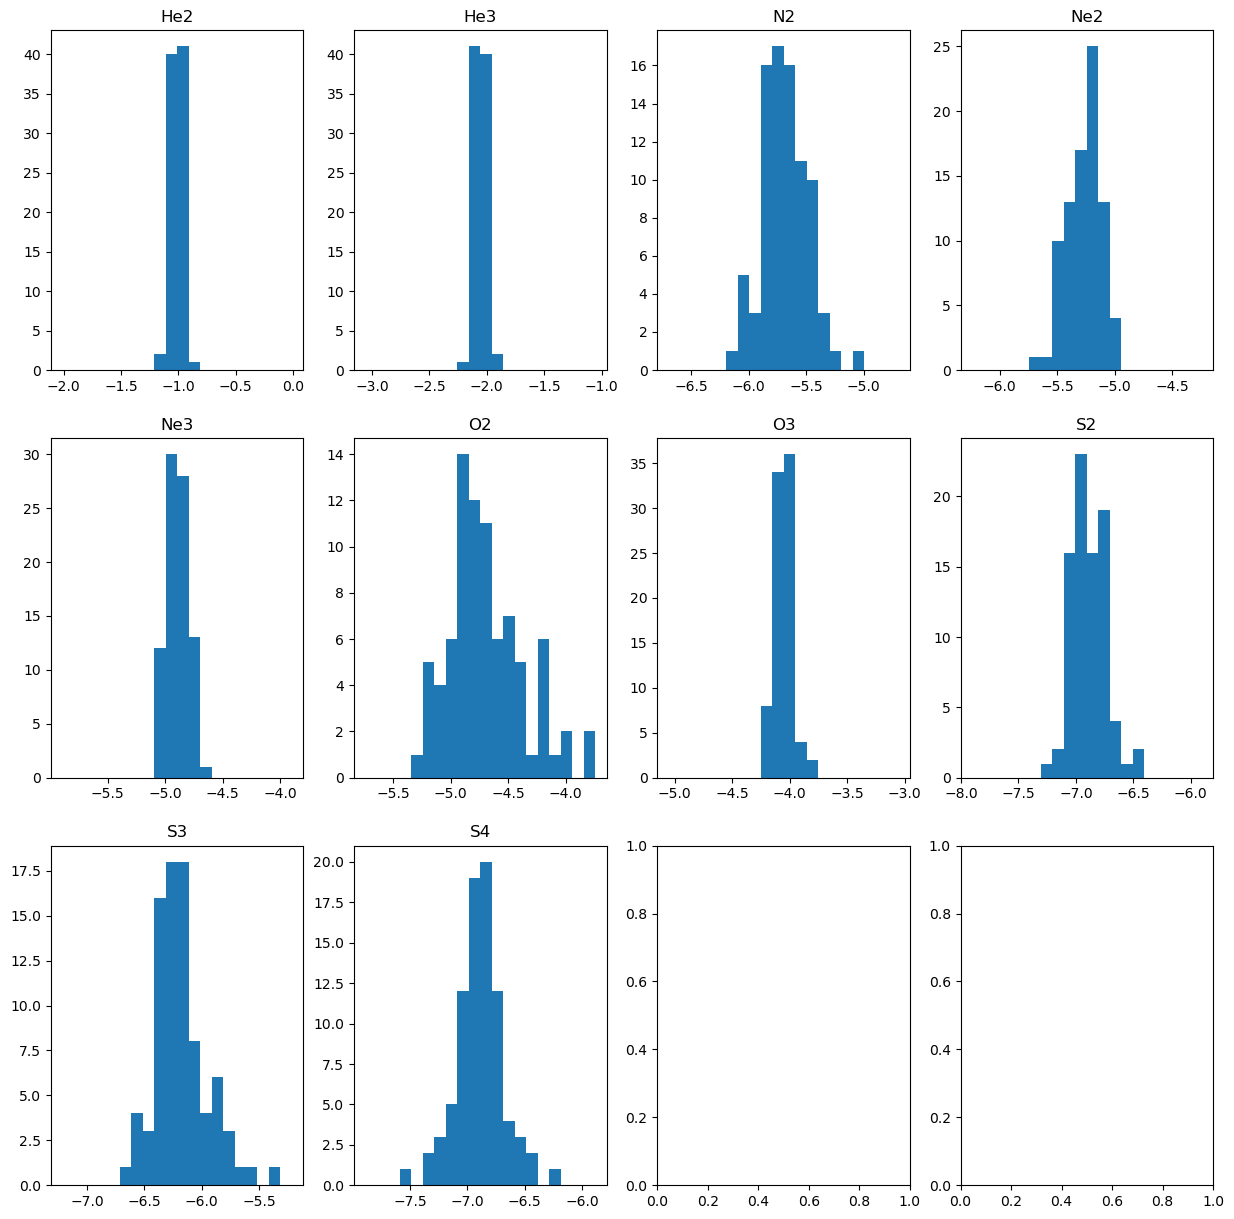

In [ ]:
from scipy.stats.mstats import mquantiles

f, axes = plt.subplots(3,4, figsize=(15, 15))
for i, ion in enumerate(sorted(ab_dic.keys())):
    ax = axes.ravel()[i]
    this_ion_ab = np.log10(ab_dic[ion])
    this_ion_ab = this_ion_ab[np.isfinite(this_ion_ab)]
    med = np.median(this_ion_ab)
    try:
        quants = mquantiles(this_ion_ab, [0.16, 0.84])
        error_up = quants[1] - med
        error_down = med - quants[0]
        ax.hist(this_ion_ab, range = (med-1., med+1.), bins=20)
        ax.set_title(ion)
        print('{:3}: {:.2f}+{:.2f}-{:.2f}'.format(ion, med, error_up, error_down))
    except:
        print('ion {} not working'.format(ion))